<a href="https://colab.research.google.com/github/VarvaraChris/Lab/blob/dev/%22lab_work%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 234MB/s]


Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [ ]:
data = pd.read_csv('coins.csv', index_col=['date'])
coins = pd.DataFrame(data=data)

Посмотрим что получилось

In [ ]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
print(coins['name'].value_counts().size)

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
print("Начало: ", coins.index.min())
print("Конец: ", coins.index.max())

Начало:  2013-04-28
Конец:  2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
coins.isnull().sum()

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
max_high = coins['high'].max()
highest_price = coins.loc[coins['high'] == max_high, ['name', 'high']]
print('Самая высокая цена была у', highest_price.name[0], highest_price.index[0], sep=' ')

Самая высокая цена была у Bitcoin 2017-12-17


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Самая высокая средняя капитализация:  Bitcoin
Самая низкая средняя капитализация:  KingN Coin


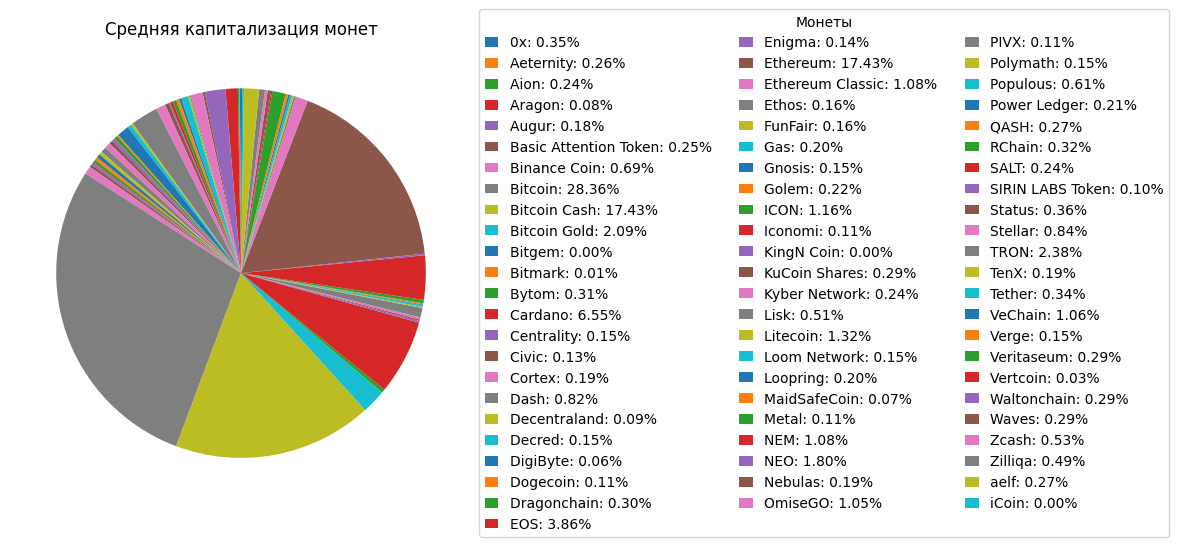

In [ ]:
average_market = coins.groupby('name')['market'].mean()
max_avg_cap = average_market.idxmax()
min_avg_cap = average_market.idxmin()
total = average_market.sum()
percentages = 100 * average_market / total
labels = [f'{name}: {percentage:.2f}%' for name, percentage in percentages.items()]
print("Самая высокая средняя капитализация: ", max_avg_cap)
print("Самая низкая средняя капитализация: ", min_avg_cap)
fig = plt.figure(figsize=(12, 6), facecolor='white', dpi=100)
plt.pie(average_market, startangle=140)
plt.title('Средняя капитализация монет')
plt.legend(labels, title="Монеты", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), ncol=3, handlelength=1)
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    table = coins.loc[(coins['symbol'] == symbol), ['open', 'close', 'high', 'low']]
    table = table.loc[start_date:end_date]

    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(111)

    ax.set_xlabel('Дата', fontsize=20)
    ax.set_ylabel('Цена', fontsize=20)
    ax.set_title('Изменение цены валюты за выбранный диапазон', fontsize=20)

    colors = ['red', 'orange', 'blue', 'green']
    labels = ['Цена начала продаж', 'Цена конца продаж', 'Максимальная цена за день', 'Минимальная цена за день']
    for color, label, column in zip(colors, labels, table.columns):
        ax.plot(table.index, table[column], color=color, label=label, linewidth=1)

    ax.set_xticks(table.index[::len(table) // 10])

    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

Посмотрим, что получилось:

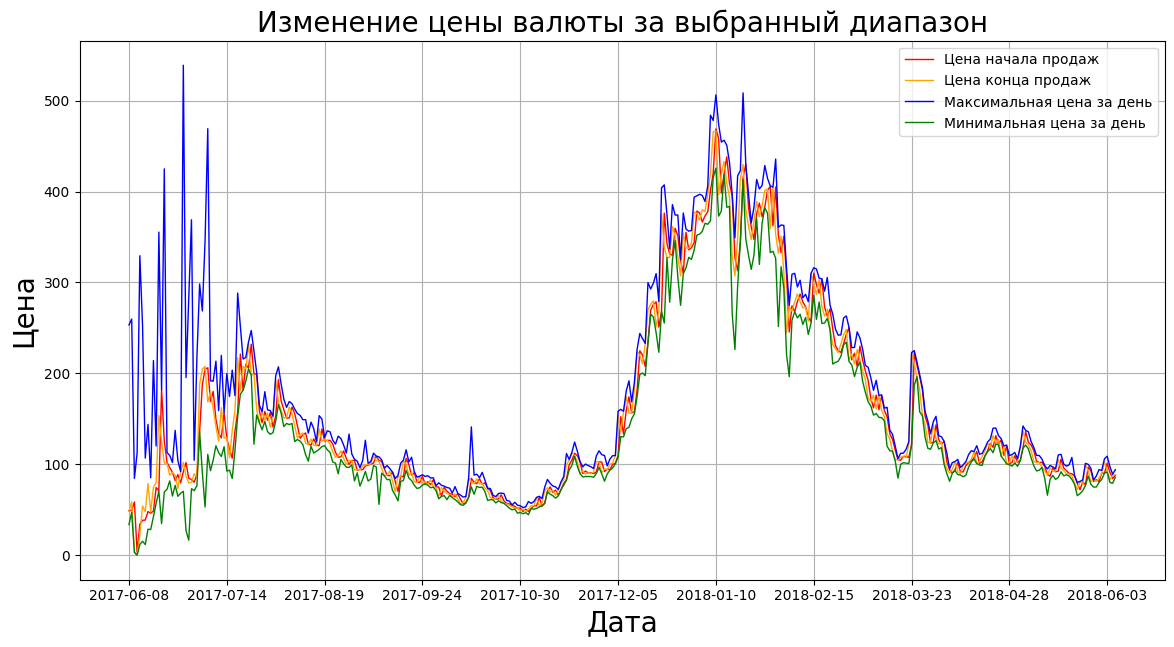

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    table = coins.loc[coins['symbol'] == symbol]
    table = table.loc[start_date:end_date]
    max_price = table[['open', 'close']].max(axis=1)
    pnd = table.high / max_price
    return pnd.idxmax(), pnd.max()

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

Сравните эти значения для разных монет:

In [ ]:
for coin_name in set(coins.symbol):
    result = find_most_severe_pump_and_dump(coins, symbol=coin_name, start_date='2017-06-01', end_date='2018-06-01')
    status = 'в пределах нормы, скорее всего накачивали' if result[1] < 2 else 'выше нормы, скорее всего накачивали'
    print(f"Дата: {result[0]}, Монета: {coin_name}, pnd: {result[1]:.2f} - {status}")

Дата: 2017-11-29, Монета: BTC, pnd: 1.14 - в пределах нормы, скорее всего накачивали
Дата: 2017-12-19, Монета: ETC, pnd: 1.15 - в пределах нормы, скорее всего накачивали
Дата: 2017-12-26, Монета: BNB, pnd: 1.18 - в пределах нормы, скорее всего накачивали
Дата: 2018-04-24, Монета: CTXC, pnd: 1.14 - в пределах нормы, скорее всего накачивали
Дата: 2017-11-23, Монета: QASH, pnd: 1.67 - в пределах нормы, скорее всего накачивали
Дата: 2018-03-05, Монета: ZIL, pnd: 1.46 - в пределах нормы, скорее всего накачивали
Дата: 2017-09-28, Монета: ZEC, pnd: 1.33 - в пределах нормы, скорее всего накачивали
Дата: 2017-08-05, Монета: ETHOS, pnd: 1.37 - в пределах нормы, скорее всего накачивали
Дата: 2017-09-29, Монета: SALT, pnd: 1.23 - в пределах нормы, скорее всего накачивали
Дата: 2017-11-02, Монета: POWR, pnd: 1.36 - в пределах нормы, скорее всего накачивали
Дата: 2017-06-07, Монета: MAID, pnd: 1.29 - в пределах нормы, скорее всего накачивали
Дата: 2018-04-13, Монета: GNT, pnd: 1.69 - в пределах норм

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    start_cost = sum(investments.values())
    start_day = coins.loc[start_date]
    coins_count = dict()
    for symbol in investments:
        start_price = start_day['price'][start_day['symbol'] == symbol]
        coins_count[symbol] = investments[symbol] / start_price[0]
    end_day = coins.loc[end_date]
    end_cost = 0
    for symbol in investments:
        end_price = end_day['price'][end_day['symbol'] == symbol]
        end_cost += end_price[0] * coins_count[symbol]
    return (end_cost - start_cost) / start_cost

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    coin_data = coins[coins['symbol'] == symbol].copy()
    coin_data['MA'] = coin_data['price'].rolling(window=window).mean()
    coin_data['std'] = coin_data['price'].rolling(window=window).std()

    coin_data['Upper_Band'] = coin_data['MA'] + (coin_data['std'] * width)
    coin_data['Lower_Band'] = coin_data['MA'] - (coin_data['std'] * width)

    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Дата', fontsize=20)
    ax.set_ylabel('Цена', fontsize=20)
    ax.set_title(f'Технический анализ для {symbol}', fontsize=20)

    ax.plot(coin_data.index, coin_data['price'], color='blue', label='Цена', linewidth=1)
    ax.plot(coin_data.index, coin_data['MA'], color='red', label='Скользящее среднее', linewidth=1)
    ax.plot(coin_data.index, coin_data['Upper_Band'], color='green', label='Верхняя граница Боллинджера', linewidth=1)
    ax.plot(coin_data.index, coin_data['Lower_Band'], color='orange', label='Нижняя граница Боллинджера', linewidth=1)

    ax.set_xticks(coin_data.index[::len(coin_data) // 10])

    ax.legend(loc='best')
    ax.grid(True)
    plt.show()


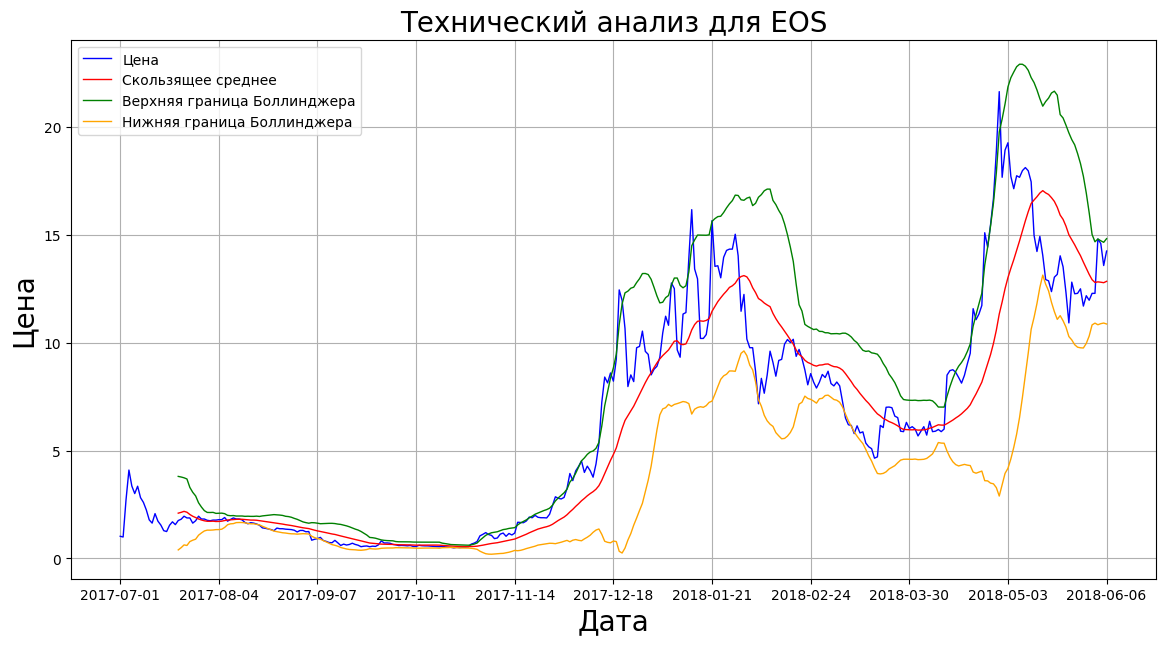

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Правило Боллинджера выполнилось на большей части графика. Цены находятся внутри границ, при этом в моменты сильного подъема или резкого спада цен график почти полностью отражается от верхних и нижних границ соответственно.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    coins = coins[(coins.index >= start_date) & (coins['symbol'].apply(lambda x: x in symbols))]
    market_sum = coins.groupby(coins.index)['market'].sum()
    market_sum = pd.DataFrame(data=market_sum.values, columns=['market'], index=market_sum.index)

    # Первый график: Общая капитализация монет
    fig = plt.figure(figsize=(13, 6))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Дата', fontsize=18)
    ax.set_ylabel('Капитализация', fontsize=18)
    ax.set_title('Общая капитализация монет', fontsize=18)

    for symbol in symbols:
        coin_market = coins.loc[coins.symbol == symbol, ['market']]
        ax.plot(coin_market.index, coin_market, label=symbol, linewidth=1)

    ax.set_xticks(coin_market.index[::len(coin_market) // 10])
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

    # Второй график: Доля капитализации от общей капитализации рынка
    fig = plt.figure(figsize=(13, 6))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Дата', fontsize=18)
    ax.set_ylabel('Доля капитализации', fontsize=18)
    ax.set_title('Доля капитализации от общей капитализации рынка монет', fontsize=18)

    for symbol in symbols:
        coin_market = coins.loc[coins.symbol == symbol, ['market']]
        ratio = coin_market / market_sum
        ax.plot(ratio.index, ratio, label=symbol, linewidth=1)

    ax.set_xticks(ratio.index[::len(ratio) // 10])
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()


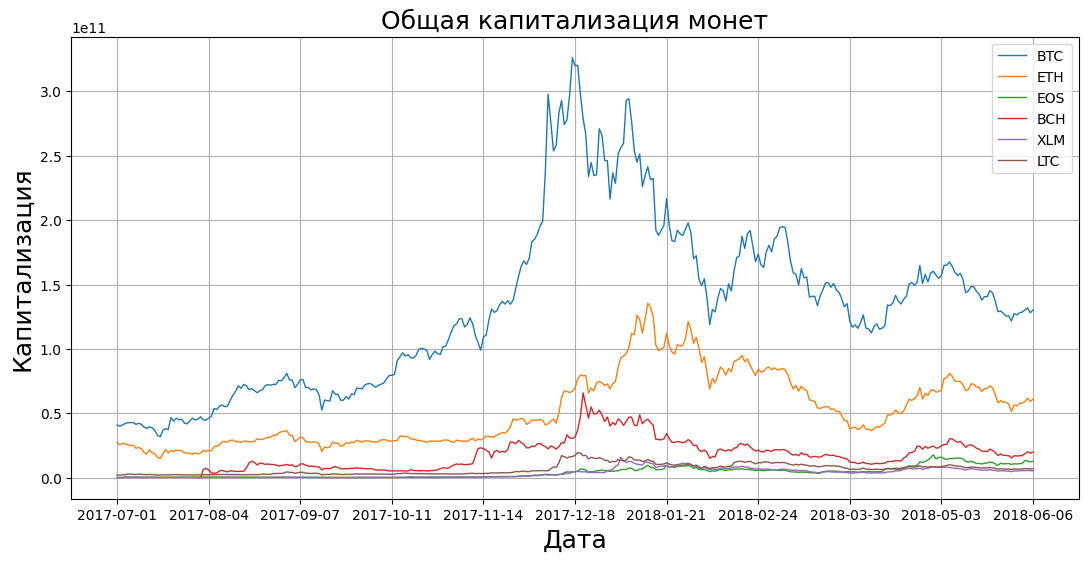

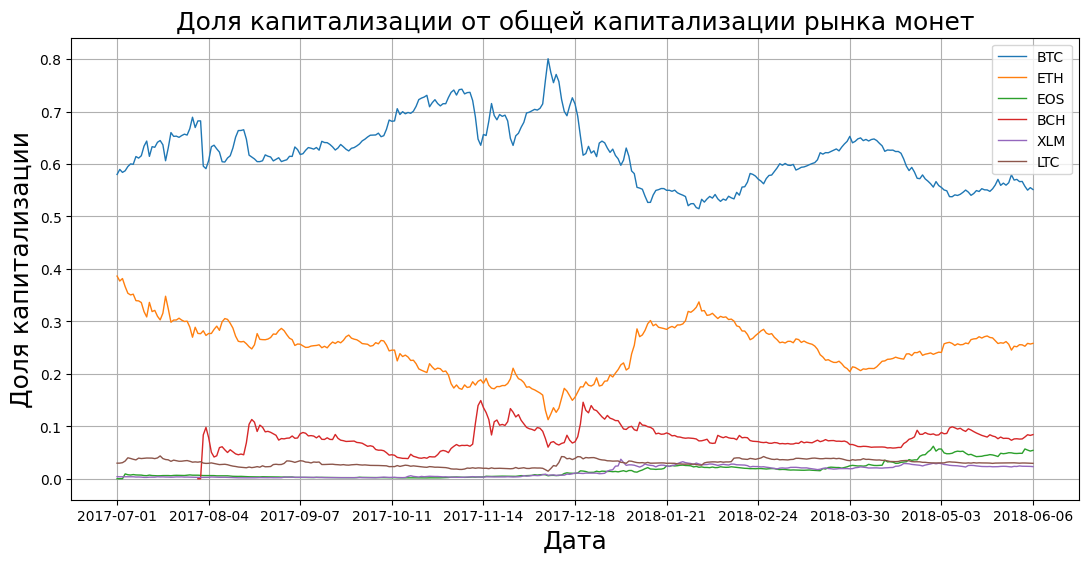

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Анализируя график, можно заметить, что доля капитализации биткойна в определенные периоды времени обратно пропорциональна доле капитализации альткойнов. Это может быть связано с тем, что инвесторы считают биткойн более надежным вариантом для вложений по сравнению с нестабильными альткойнами. Инвесторы, не желая идти на риск и вкладывать значительные суммы в валюты, у которых может быть шанс увелечения их ценности в долгосрочной перспективе, предпочитают более проверенный актив - биткойн, с меньшим риском убытков.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    coins = coins[(coins.index <= date) & (coins['symbol'].apply(lambda x: x in symbols))]
    market_sum = data.groupby(data.index)['market'].sum()
    market_sum = pd.DataFrame(data=market_sum.values, columns=['market'], index=market_sum.index)

    smoothed_data = {}
    for symbol in symbols:
        coin_market = coins.loc[coins.symbol == symbol, ['market']]
        data['market_ratio'] = coin_market / market_sum
        smoothed_data[symbol] = data['market_ratio'].ewm(span=window, adjust=False).mean()

    smoothed_data = pd.DataFrame(smoothed_data)
    correlation = smoothed_data.corr()

    return correlation

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.88,-0.66,-0.10,-0.74,-0.15,-0.82
ETH,-0.88,1.00,0.02,-0.33,0.46,0.35,0.41
EOS,-0.66,0.02,1.00,0.01,0.79,0.20,0.42
BCH,-0.10,-0.33,0.01,1.00,-0.05,-0.11,0.12
XLM,-0.74,0.46,0.79,-0.05,1.00,0.42,0.83
LTC,-0.15,0.35,0.20,-0.11,0.42,1.00,0.36
ADA,-0.82,0.41,0.42,0.12,0.83,0.36,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.77,-0.58,-0.64,-0.68,-0.26,-0.84
ETH,-0.77,1.00,-0.68,-0.67,0.21,0.22,-0.63
EOS,-0.58,-0.68,1.00,0.80,0.95,0.79,0.97
BCH,-0.64,-0.67,0.80,1.00,0.74,0.59,0.74
XLM,-0.68,0.21,0.95,0.74,1.00,0.68,0.97
LTC,-0.26,0.22,0.79,0.59,0.68,1.00,0.91
ADA,-0.84,-0.63,0.97,0.74,0.97,0.91,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

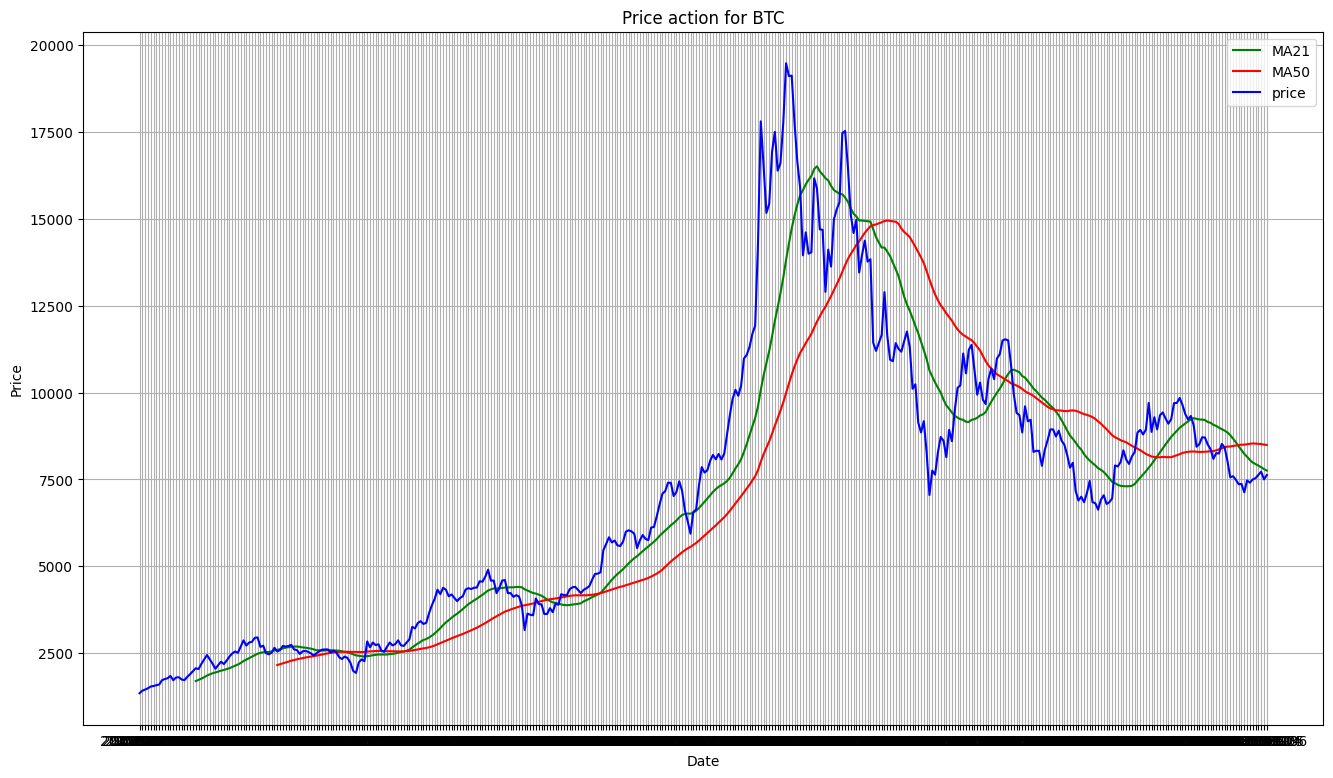

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date):
    start_date = str(start_date).split()[0]
    end_date = str(end_date).split()[0]
    df = coins[coins['symbol'] == symbol][start_date:end_date]
    df['leading_mean'] = df['close'].rolling(window=lead_window).mean()
    df['lagging_mean'] = df['close'].rolling(window=lag_window).mean()
    df = pd.concat([df, df[df.isnull().any(axis = 1)]]).drop_duplicates(keep = False) # Выкидываем Nan значения

    # Расчет multiplier для обычного инвестирования
    df['normal_multiplier'] = df['close'] / df['close'].shift(1)
    df['normal_cumulative'] = df['normal_multiplier'].cumprod()

    df.sort_values(by='date', inplace=True)
    # Расчет multiplier для стратегии
    df['strategy_multiplier'] = 1.0
    df['strategy_cumulative'] = 1.0
    for i in range(1, len(df)):
        if df.iloc[i-1]['leading_mean'] > df.iloc[i-1]['lagging_mean'] and (df.iloc[i-1]['leading_mean'] - df.iloc[i-1]['lagging_mean']) / df.iloc[i-1]['close'] >= threshold:
            df.at[df.index[i], 'strategy_multiplier'] = df.iloc[i]['close'] / df.iloc[i-1]['close'] #нужно исправить случай, когда делим на 0

    df['strategy_cumulative'] = df['strategy_multiplier'].cumprod()

    # Построение графиков
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

    # График цен и скользящих средних
    ax1.plot(df.index, df['close'], label="Цена")
    ax1.plot(df.index, df['leading_mean'], label=f"MA{lead_window}")
    ax1.plot(df.index, df['lagging_mean'], label=f"MA{lag_window}")
    ax1.set_title(f'Price action for {symbol}', fontsize=18)
    ax1.set_xlabel('Дата', fontsize=18)
    ax1.set_ylabel('Цена', fontsize=18)
    ax1.set_xticks(df.index[::len(df) // 10])
    ax1.legend()
    ax1.grid()

    # График сравнения стратегий
    ax2.plot(df.index, df['normal_cumulative'], label='Обычное инвестирование')
    ax2.plot(df.index, df['strategy_cumulative'], label='Стратегия')
    ax2.set_title('Сравнение стратегий', fontsize=18)
    ax2.set_xlabel('Дата', fontsize=18)
    ax2.set_ylabel('Мультипликатор', fontsize=18)
    ax2.set_xticks(df.index[::len(df) // 10])
    ax2.legend()
    ax2.grid()

    plt.show()

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.